## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage, compute_usage, assign_onsets
%matplotlib inline
import datetime

In [2]:
def mouse_map(string):
    '''returns mouse identity'''
    if 'ong4' in string:
        return '04'+m
    if 'ong3' in string:
        return '03'+m
    if 'ong2' in string:
        return '02'+m
    if 'ong1' in string:
        return '01'+m
    return string[:5]

In [3]:
## for females

In [4]:
## upload data frame females
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_07')
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_07/longtogeny_v2_females_syllable_df_v00.parquet')
df = pd.read_parquet(path)

## get syllable maps from male ontogeny
df_temp = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_07/ontogeny_males_syllable_df_v00.parquet')
df_temp,usage_map = relabel_by_usage(df_temp, return_map=True)

df = assign_onsets(df)
df['relabeled_syllables'] = df['syllables'].map(usage_map)

In [5]:
# calculate age for females
first= pd.Timestamp(year=2023, month=6, day=29)
age = (df.date-first).dt.days+20
df.age=age
df['age'] = df['age'].astype('int32[pyarrow]')

In [6]:
sorted(df.age.unique())

[24,
 25,
 26,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 38,
 39,
 40,
 41,
 42,
 45,
 46,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 56,
 60,
 63,
 67,
 69,
 73,
 76,
 80,
 81,
 82,
 83,
 84,
 88,
 91,
 94,
 98,
 101,
 106,
 107,
 108,
 109,
 110,
 111,
 116,
 118,
 123,
 125,
 130,
 132]

## manual curations

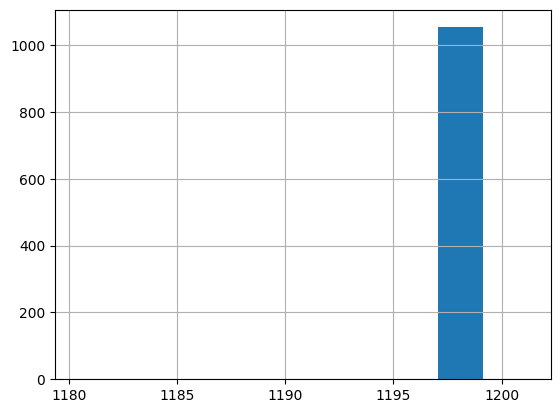

In [7]:
# clean up the data by removing short sessions
t = 600
session_length = df.groupby("uuid", sort=False)['timestamps'].max()
remove_uuids = session_length[session_length < t].index
session_length.hist()
df = df[~df['uuid'].isin(remove_uuids)]

In [8]:
# clean up the data by removing long sessions
t = 1250
session_length = df.groupby("uuid", sort=False)['timestamps'].max()
remove_uuids = session_length[session_length > t].index
df = df[~df['uuid'].isin(remove_uuids)]

<Axes: >

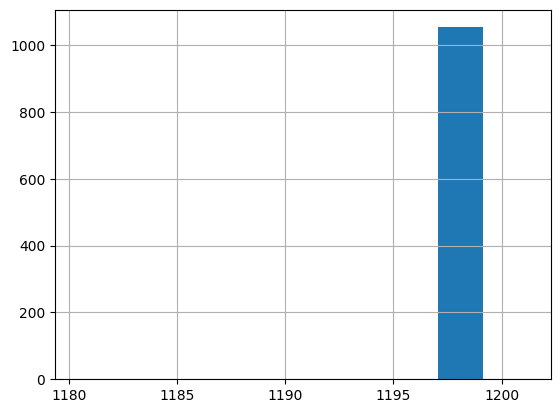

In [9]:
session_length = df.groupby("uuid", sort=False)['timestamps'].max()
session_length.hist()

In [10]:
# remove duplicated files due to cleaning extractions
new_df = []
for (date, subject), _df in df.groupby(['date', 'subject_name'], sort=False):
    if _df['uuid'].nunique() > 1:
        _df = _df[_df['file'].str.contains('proc_cleaned')]
    new_df.append(_df)
    
df = pd.concat(new_df)

## get mouse names

In [11]:
sorted(df['subject_name'].unique())

['F1_01_01',
 'F1_01_02',
 'F1_01_03',
 'F1_01_04',
 'F1_01_05',
 'F1_01_06',
 'F1_01_07',
 'F1_01_08',
 'F1_01_09',
 'F1_01_10',
 'F1_01_11',
 'F1_01_12',
 'F1_01_13',
 'F1_01_14',
 'F1_01_15',
 'F1_01_16',
 'F1_01_17',
 'F1_01_18',
 'F1_01_19',
 'F1_01_28',
 'F1_01_29',
 'F1_01_30',
 'F1_01_31',
 'F1_01_32',
 'F1_01_33',
 'F1_01_34',
 'F1_01_35',
 'F1_01_36',
 'F1_01_37',
 'F1_01_38',
 'F1_01_39',
 'F1_01_40',
 'F1_01_41',
 'F1_01_42',
 'F1_01_43',
 'F1_01_44',
 'F1_01_45',
 'F1_01_46',
 'F1_01_47',
 'F1_01_48',
 'F1_01_49',
 'F1_01_50',
 'F1_01_51',
 'F1_01_52',
 'F1_01_53',
 'F1_01_54',
 'F1_01_55',
 'F1_01_56',
 'F1_01_57',
 'F1_01_58',
 'F1_01_59',
 'F1_01_60',
 'F1_01_61',
 'F1_02_01',
 'F1_02_02',
 'F1_02_03',
 'F1_02_04',
 'F1_02_05',
 'F1_02_06',
 'F1_02_07',
 'F1_02_08',
 'F1_02_09',
 'F1_02_10',
 'F1_02_11',
 'F1_02_12',
 'F1_02_13',
 'F1_02_14',
 'F1_02_15',
 'F1_02_16',
 'F1_02_17',
 'F1_02_18',
 'F1_02_19',
 'F1_02_28',
 'F1_02_29',
 'F1_02_30',
 'F1_02_31',
 'F1_02_32',

In [12]:
# calculate mouse identity
df['mouse'] = df['subject_name'].map(mouse_map)

In [13]:
df['mouse'] = df['mouse'].replace('f1_04', 'F1_04')

In [14]:
sorted(df['mouse'].unique())

['F1_01',
 'F1_02',
 'F1_03',
 'F1_04',
 'F2_01',
 'F2_02',
 'F2_03',
 'F2_04',
 'F3_01',
 'F3_02',
 'F3_03',
 'F3_04',
 'F4_01',
 'F4_02',
 'F4_03',
 'F4_04',
 'F5_01',
 'F5_02',
 'F5_03',
 'F5_04']

In [15]:
## keep only mice that are part of the male experiment
keep_mice = ['F1_01',
 'F1_02',
 'F1_03',
 'F1_04',
 'F2_01',
 'F2_02',
 'F2_03',
 'F2_04',
 'F3_01',
 'F3_02',
 'F3_03',
 'F3_04',
 'F4_01',
 'F4_02',
 'F4_03',
 'F4_04',
 'F5_01',
 'F5_02',
 'F5_03',
 'F5_04']
df = df[df['mouse'].isin(keep_mice)].reset_index()
#df['mouse'] = df['mouse'].replace(to_replace=df['mouse'].unique(), value=list(range(1,len(df['mouse'].unique())+1)))

In [16]:
# calculate usage
usage_df = df.query('onsets').groupby(['age','uuid','mouse','subject_name','date'])['relabeled_syllables'].value_counts(normalize=True)
usage_df.name = 'usage'
usage_df = usage_df.reset_index()

In [17]:
## remove sessions were a syllable occours more than x% of time
thresh=0.2
syll_usage = usage_df.groupby("uuid", sort=False)['usage'].max()
remove_uuids=syll_usage[syll_usage>thresh].to_frame().reset_index()['uuid']
usage_df = usage_df[~usage_df['uuid'].isin(remove_uuids)]

In [18]:
# define cage
usage_df['cage'] = usage_df.mouse.str[:2]

# some tests

In [19]:
# figure out if male and female data mixed by checking if for similar age we have a different session number
# calculate usage
temp = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age','uuid','subject_name','date']).fillna(0).reset_index()

ages = temp.age.unique()
for age in ages:
    curr = temp[temp.age==age]
    sessions = curr.subject_name.str[-3:] #get session number
    if len(sessions.unique())>1: #if the same age has different session numbers
        curr_print = curr[['subject_name','age','date']]
        print(curr_print)
        print(len(curr_print))

In [20]:
#check number of sessions per age
temp = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age','uuid','subject_name','date']).fillna(0).reset_index()
counter = Counter(temp['age'])
counter

Counter({24: 20,
         25: 20,
         26: 20,
         27: 20,
         28: 20,
         32: 20,
         34: 20,
         35: 20,
         38: 20,
         40: 20,
         41: 20,
         45: 20,
         46: 20,
         47: 20,
         48: 20,
         49: 20,
         52: 20,
         53: 20,
         54: 20,
         55: 20,
         56: 20,
         60: 20,
         63: 20,
         67: 20,
         69: 20,
         73: 20,
         80: 20,
         81: 20,
         82: 20,
         83: 20,
         84: 20,
         88: 20,
         91: 20,
         94: 20,
         98: 20,
         101: 20,
         106: 20,
         107: 20,
         108: 20,
         109: 20,
         110: 20,
         111: 20,
         116: 20,
         118: 20,
         123: 20,
         125: 20,
         130: 20,
         132: 20,
         39: 19,
         76: 19,
         33: 18,
         42: 18,
         31: 17})

In [21]:
usage_mtx = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age', 'mouse','cage','uuid','subject_name']).fillna(0)
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_07')
usage_mtx.to_parquet(data_folder / "longv2_females_clean_v1.parquet", engine='pyarrow') 

In [22]:
# find ages where less than 9 data points exists and filter them out (not sure we want that)
temp = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age','uuid','subject_name','date']).fillna(0).reset_index()
counter = Counter(temp['age'])
thresh=9
remove_sessions = ([k for k, v in counter.items() if v < thresh])
usage_df = usage_df[~usage_df['age'].isin(remove_sessions)]

## save dataframe

In [23]:
usage_mtx = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age', 'mouse','cage','uuid','subject_name']).fillna(0)
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_07')
usage_mtx.to_parquet(data_folder / "longv2_females_clean_v2.parquet", engine='pyarrow') 